In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./../../')
sys.path.append('./..')
sys.path.append('./../../designer/script/')

import numpy as np
import matplotlib.pyplot as plt
import copy
import dill

from film import FreeFormFilm, BaseFilm, TwoMaterialFilm, EqOTFilm
from design import BaseDesign
from spectrum import BaseSpectrum, Spectrum
from optimizer.adam import AdamFreeFormOptimizer

from analyze_utils.make_design import make_edgefilter_design, make_triband_filter_design, make_reflection_design, get_minus_filter_spec

from utils.loss import calculate_RMS_f_spec
from analyze_utils.result_io import save, load
from analyze_utils.structure import plot_layer_thickness



In [2]:
wls = np.linspace(300, 800, 1000)
target = get_minus_filter_spec(wls, h=0.5, left=400, right=700)

total_gt = 5000 # 5um, since n\approx 2
init_n = np.zeros(1000) + 2

film = FreeFormFilm(init_n, total_gt, 1.94, 1.94)

film.add_spec_param(0., wls)

In [3]:
optimizer = AdamFreeFormOptimizer(film, [target], 1000, 0.01, n_min=1.75, n_max=2.15, show=True)
optimizer.optimize()

dill.dump(film, file=open('./film_design_tmp', 'wb'))

/home/vipuser/miniconda3/envs/tf_design/lib/python3.10/site-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 63 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/vipuser/miniconda3/envs/tf_design/lib/python3.10/site-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 63 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
film = dill.load(file=open('./film_design_tmp', 'wb'))

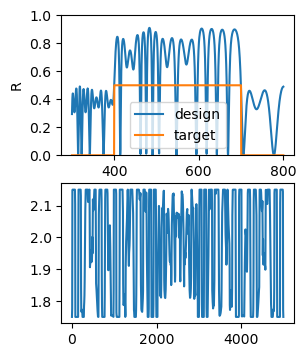

In [18]:
fig, (ax, axn) = plt.subplots(2, 1)
fig.set_size_inches(3, 4)
ax.plot(wls, film.get_spec().get_R(), label='design')
ax.plot(wls, target.get_R(), label='target')

ax.set_xlabel('wl / nm')
ax.set_ylabel('R')
ax.set_ylim(0, 1)
ax.legend()

axn.plot(np.linspace(0, total_gt, film.get_n().shape[0]), film.get_n())
# axn.set_ylim(1.5, 2.5)

In [19]:
film.get_spec(0., wls).calculate()
